In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import arange
from numpy import argmax

import seaborn as sns

sns.set(style="darkgrid")

import os
import warnings
warnings.filterwarnings("ignore")

In [357]:
df=pd.read_csv('veris_premodel.csv')

In [358]:
df.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,4.0,2017,confidentiality,alter behavior,3.0,yes,social,phishing,email,law enforcement,server,mail,0.0,6.0,NaN,NaN,NaN,0
1,PA,healthcare,NaN,2018,confidentiality,data loss,1.0,yes,misuse,knowledge abuse,physical access,NaN,server,database,0.0,4.0,NaN,0.0,2.0,0
2,NE,finance and insurance,6.0,2017,confidentiality,data loss,2.0,yes,physical,skimmer,victim public area,customer,terminal,atm,0.0,NaN,NaN,NaN,NaN,0
3,OH,government,3.0,2015,confidentiality,data loss,NaN,yes,error,omission,NaN,customer,media,disk media,0.0,NaN,NaN,NaN,NaN,0
4,NaN,retail trade,1.0,2017,integrity,hardware tampering,3.0,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0.0,2.0,NaN,NaN,2.0,0


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1604 non-null   object 
 1   industry               1806 non-null   object 
 2   n_employees            1372 non-null   float64
 3   incident_year          1806 non-null   int64  
 4   attribute              1806 non-null   object 
 5   compromise             1797 non-null   object 
 6   confidence             745 non-null    float64
 7   data_disclosure        1766 non-null   object 
 8   action                 1800 non-null   object 
 9   action_variety         1543 non-null   object 
 10  action_vector          1448 non-null   object 
 11  discovery_variety      1020 non-null   object 
 12  asset_group            1806 non-null   object 
 13  asset_variety          1806 non-null   object 
 14  availability_duration  1655 non-null   float64
 15  disc

In [360]:
df['incident_year']=df['incident_year'].astype('object')

In [361]:
df.shape

(1806, 20)

In [362]:
ef=df[['state','actor']]

In [363]:
ef[ef['actor']==1].count()

state    36
actor    51
dtype: int64

In [364]:
def missing_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [365]:
missing_table(df)

Your selected dataframe has 20 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,1568,86.8
containment,1549,85.8
time_compromise,1446,80.1
discovery,1248,69.1
confidence,1061,58.7
discovery_variety,786,43.5
n_employees,434,24.0
action_vector,358,19.8
action_variety,263,14.6
state,202,11.2


In [366]:

frequencies = df.state.value_counts(normalize=True, ascending=True)
threshold = frequencies[(frequencies.cumsum() > 0.01).idxmax()]
frequencies

SD    0.001247
RI    0.001870
ND    0.001870
NV    0.001870
HI    0.002494
ID    0.002494
AR    0.003117
NH    0.003117
VT    0.003117
ME    0.003117
WY    0.003741
DE    0.004364
NE    0.004988
MT    0.004988
OK    0.005611
WV    0.006234
MS    0.006234
KS    0.006858
IA    0.007481
AK    0.007481
KY    0.008105
LA    0.008105
UT    0.008105
NM    0.008728
SC    0.009352
WI    0.010599
AZ    0.010599
OR    0.012469
CT    0.016209
CO    0.017456
NC    0.017456
IN    0.017456
MO    0.019950
TN    0.021197
AL    0.021197
MN    0.021197
MD    0.022444
MI    0.022444
MA    0.023067
NJ    0.023691
WA    0.023691
DC    0.025561
OH    0.029302
GA    0.031172
IL    0.035536
VA    0.039277
PA    0.040524
TX    0.051746
NY    0.081047
FL    0.084788
CA    0.155237
Name: state, dtype: float64

In [367]:

round(threshold,4)

0.0025

In [368]:
cols=df.keys()
freq=[]

for col in cols:
    freq.append(df[col].value_counts(normalize=True, ascending=True))
    pd.DataFrame(freq)
freq

[SD    0.001247
 RI    0.001870
 ND    0.001870
 NV    0.001870
 HI    0.002494
 ID    0.002494
 AR    0.003117
 NH    0.003117
 VT    0.003117
 ME    0.003117
 WY    0.003741
 DE    0.004364
 NE    0.004988
 MT    0.004988
 OK    0.005611
 WV    0.006234
 MS    0.006234
 KS    0.006858
 IA    0.007481
 AK    0.007481
 KY    0.008105
 LA    0.008105
 UT    0.008105
 NM    0.008728
 SC    0.009352
 WI    0.010599
 AZ    0.010599
 OR    0.012469
 CT    0.016209
 CO    0.017456
 NC    0.017456
 IN    0.017456
 MO    0.019950
 TN    0.021197
 AL    0.021197
 MN    0.021197
 MD    0.022444
 MI    0.022444
 MA    0.023067
 NJ    0.023691
 WA    0.023691
 DC    0.025561
 OH    0.029302
 GA    0.031172
 IL    0.035536
 VA    0.039277
 PA    0.040524
 TX    0.051746
 NY    0.081047
 FL    0.084788
 CA    0.155237
 Name: state, dtype: float64,
 agriculture & animal     0.001107
 consultation/service     0.001107
 utilities                0.001661
 information/ app         0.003322
 mining       

In [370]:
freq1=df.action_variety.value_counts(normalize=True, ascending=True)
threshold1 = frequencies[(frequencies.cumsum() > 0.05).idxmax()]
freq1.head(10)

illicit content     0.000648
cache poisoning     0.000648
path traversal      0.000648
destroy data        0.000648
misinformation      0.000648
export data         0.000648
flood               0.000648
email attachment    0.000648
ssi injection       0.000648
net misuse          0.000648
Name: action_variety, dtype: float64

In [371]:
threshold1

0.006234413965087282

In [372]:
freq2=df.action_vector.value_counts(normalize=True, ascending=True)
threshold2 = frequencies[(frequencies.cumsum() > 0.05).idxmax()]
freq2.head(10)

visitor privileges          0.000691
partner vehicle             0.000691
humidity                    0.000691
command shell               0.000691
software update             0.000691
network propagation         0.000691
uncontrolled location       0.001381
desktop sharing software    0.001381
desktop sharing             0.001381
removable media             0.001381
Name: action_vector, dtype: float64

## Dealing  Missing and Rare Values

In [17]:
df_im=df.copy()

In [18]:
df_im['state'].fillna('Other', inplace=True)

In [373]:
#df_im['state'].mask(df_im['state'].map(frequencies)< threshold, 'Other', inplace=True)

In [374]:
df_im.state.value_counts()

CA       249
Other    213
FL       136
NY       130
TX        83
PA        65
VA        63
IL        57
GA        50
OH        47
DC        41
WA        38
NJ        38
MA        37
MI        36
MD        36
MN        34
AL        34
TN        34
MO        32
IN        28
NC        28
CO        28
CT        26
OR        20
AZ        17
WI        17
SC        15
NM        14
KY        13
UT        13
LA        13
IA        12
AK        12
KS        11
WV        10
MS        10
OK         9
MT         8
NE         8
DE         7
WY         6
NH         5
AR         5
ME         5
VT         5
ID         4
HI         4
Name: state, dtype: int64

In [375]:
df_im['action_variety'].mask(df_im['action_variety'].map(freq1)<threshold1, 'other', inplace=True)

In [376]:
df_im['action_vector'].mask(df_im['action_vector'].map(freq2)<threshold2, 'other', inplace=True)

In [377]:
df_im.compromise.fillna('other', inplace=True)

In [381]:
df_im.compromise.value_counts()

data loss                 952
loss                      155
fraudulent transaction    129
software installation     126
alter behavior            119
hardware tampering        113
modify data                76
interruption               35
repurpose                  32
modify configuration       19
defacement                 19
other                      10
misrepresentation           8
destruction                 5
modify privileges           3
degradation                 2
log tampering               1
created account             1
missappropriation           1
Name: compromise, dtype: int64

In [382]:
missing_table(df_im)

Your selected dataframe has 20 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,1568,86.8
containment,1549,85.8
time_compromise,1446,80.1
discovery,1248,69.1
confidence,1061,58.7
discovery_variety,786,43.5
n_employees,434,24.0
action_vector,358,19.8
action_variety,263,14.6
availability_duration,151,8.4


In [383]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1806 non-null   object 
 1   industry               1806 non-null   object 
 2   n_employees            1372 non-null   float64
 3   incident_year          1806 non-null   object 
 4   attribute              1806 non-null   object 
 5   compromise             1806 non-null   object 
 6   confidence             745 non-null    float64
 7   data_disclosure        1766 non-null   object 
 8   action                 1800 non-null   object 
 9   action_variety         1543 non-null   object 
 10  action_vector          1448 non-null   object 
 11  discovery_variety      1020 non-null   object 
 12  asset_group            1806 non-null   object 
 13  asset_variety          1806 non-null   object 
 14  availability_duration  1655 non-null   float64
 15  disc

In [384]:
df_int=df_im.copy()

In [385]:
missing_table(df_int)

Your selected dataframe has 20 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,1568,86.8
containment,1549,85.8
time_compromise,1446,80.1
discovery,1248,69.1
confidence,1061,58.7
discovery_variety,786,43.5
n_employees,434,24.0
action_vector,358,19.8
action_variety,263,14.6
availability_duration,151,8.4


In [386]:
cols=['action','action_variety','action_vector','discovery_variety']

for col in cols:
    df_int[col].fillna('other', inplace=True)



In [387]:
missing_table(df_int)

Your selected dataframe has 20 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
exfiltration,1568,86.8
containment,1549,85.8
time_compromise,1446,80.1
discovery,1248,69.1
confidence,1061,58.7
n_employees,434,24.0
availability_duration,151,8.4
data_disclosure,40,2.2


In [388]:
df_int.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,4.0,2017,confidentiality,alter behavior,3.0,yes,social,phishing,email,law enforcement,server,mail,0.0,6.0,NaN,NaN,NaN,0
1,PA,healthcare,NaN,2018,confidentiality,data loss,1.0,yes,misuse,knowledge abuse,physical access,other,server,database,0.0,4.0,NaN,0.0,2.0,0
2,NE,finance and insurance,6.0,2017,confidentiality,data loss,2.0,yes,physical,skimmer,victim public area,customer,terminal,atm,0.0,NaN,NaN,NaN,NaN,0
3,OH,government,3.0,2015,confidentiality,data loss,NaN,yes,error,other,other,customer,media,disk media,0.0,NaN,NaN,NaN,NaN,0
4,Other,retail trade,1.0,2017,integrity,hardware tampering,3.0,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0.0,2.0,NaN,NaN,2.0,0


In [389]:
coll=['n_employees', 'confidence','availability_duration','data_disclosure']

for col in coll:
    df_int[col].interpolate(method='pad', limit=8, limit_direction='both', inplace=True)

In [390]:
#df_int['n_employees'].interpolate(method='pad', limit=6, limit_direction='both', inplace=True)

In [391]:
#df_int['confidence'].interpolate(method='pad', limit=12, limit_direction='both', inplace=True)

In [392]:
#df_int['availability_duration'].interpolate(method='pad', limit=6, limit_direction='both', inplace=True)

In [393]:
#df_int['data_disclosure'].interpolate(method='pad', limit=6, limit_direction='both', inplace=True)

In [394]:
colls=['containment','exfiltration','time_compromise','discovery']

for col in colls:
    df_int[col].fillna(-999, inplace=True)

In [395]:
#df_int['containment'].fillna(-999, inplace=True)

In [396]:
#df_int['exfiltration'].fillna(-999, inplace=True)

In [397]:
#df_int['time_compromise'].fillna(-999, inplace=True)

In [398]:
#df_int['discovery'].fillna(-999, inplace=True)

In [399]:
missing_table(df_int)

Your selected dataframe has 20 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
confidence,42,2.3


In [400]:
df_int['confidence'].interpolate(method='pad', limit=12, limit_direction='both', inplace=True)

In [401]:
missing_table(df_int)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [402]:
df_int.head()

,state,industry,n_employees,incident_year,attribute,compromise,confidence,data_disclosure,action,action_variety,action_vector,discovery_variety,asset_group,asset_variety,availability_duration,discovery,containment,exfiltration,time_compromise,actor
0,GA,education,4.0,2017,confidentiality,alter behavior,3.0,yes,social,phishing,email,law enforcement,server,mail,0.0,6.0,-999.0,-999.0,-999.0,0
1,PA,healthcare,4.0,2018,confidentiality,data loss,1.0,yes,misuse,knowledge abuse,physical access,other,server,database,0.0,4.0,-999.0,0.0,2.0,0
2,NE,finance and insurance,6.0,2017,confidentiality,data loss,2.0,yes,physical,skimmer,victim public area,customer,terminal,atm,0.0,-999.0,-999.0,-999.0,-999.0,0
3,OH,government,3.0,2015,confidentiality,data loss,2.0,yes,error,other,other,customer,media,disk media,0.0,-999.0,-999.0,-999.0,-999.0,0
4,Other,retail trade,1.0,2017,integrity,hardware tampering,3.0,yes,physical,skimmer,victim public area,customer,terminal,gas terminal,0.0,2.0,-999.0,-999.0,2.0,0


In [403]:
df_int['incident_year']=df_int.incident_year.astype('object')

df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1806 non-null   object 
 1   industry               1806 non-null   object 
 2   n_employees            1806 non-null   float64
 3   incident_year          1806 non-null   object 
 4   attribute              1806 non-null   object 
 5   compromise             1806 non-null   object 
 6   confidence             1806 non-null   float64
 7   data_disclosure        1806 non-null   object 
 8   action                 1806 non-null   object 
 9   action_variety         1806 non-null   object 
 10  action_vector          1806 non-null   object 
 11  discovery_variety      1806 non-null   object 
 12  asset_group            1806 non-null   object 
 13  asset_variety          1806 non-null   object 
 14  availability_duration  1806 non-null   float64
 15  disc

In [404]:
df_int.drop(columns=['state', 'incident_year'], inplace=True)

In [405]:
df_dum=pd.get_dummies(df_int)

In [406]:
df_dum.shape

(1806, 188)

In [407]:
X=df_dum.drop(columns='actor')
y=df_dum.actor

In [408]:
np.isnan(X).sum().sort_values(ascending=False)

asset_variety_ wlan                       0
action_other                              0
action_variety_exploit vuln               0
action_variety_dos                        0
action_variety_disposal error             0
                                         ..
discovery_variety_reported by employee    0
discovery_variety_other                   0
discovery_variety_nids                    0
discovery_variety_monitoring service      0
n_employees                               0
Length: 187, dtype: int64

In [409]:
from sklearn.model_selection import train_test_split


In [410]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,precision_score,classification_report, confusion_matrix

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train) # 0.25 x 0.8 = 0.2

In [412]:
from sklearn.ensemble import RandomForestClassifier

In [413]:
rfc=RandomForestClassifier()

In [414]:
rfc.fit(X_train_val, y_train_val)

RandomForestClassifier()

In [415]:
predictions=rfc.predict(X_val)

In [416]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, predictions))
conf_mat = confusion_matrix(y_val, predictions)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       351
           1       1.00      0.30      0.46        10

    accuracy                           0.98       361
   macro avg       0.99      0.65      0.73       361
weighted avg       0.98      0.98      0.98       361

Confusion matrix:
 [[351   0]
 [  7   3]]


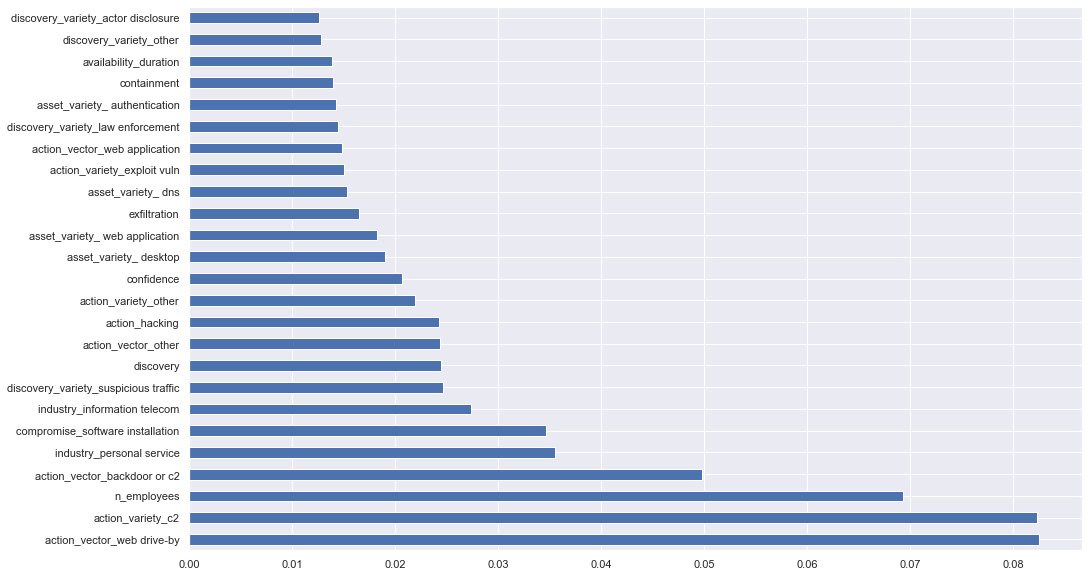

In [1096]:
plt.figure(figsize=(16, 10))
feat_importances = pd.Series(rfc.feature_importances_, index=X_train_val.columns)
feat_importances.nlargest(25).plot(kind='barh')

In [419]:
predictions=rfc.predict(X_test)

In [420]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predictions))
conf_mat = confusion_matrix(y_test, predictions)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       352
           1       1.00      0.30      0.46        10

    accuracy                           0.98       362
   macro avg       0.99      0.65      0.73       362
weighted avg       0.98      0.98      0.98       362

Confusion matrix:
 [[352   0]
 [  7   3]]


In [421]:
df_new=df_dum

In [584]:
X=df_new.drop(columns='actor')
y=df_new.actor

In [585]:
from sklearn.model_selection import train_test_split

In [586]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51, stratify=y)
    
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train) # 0.25 x 0.8 = 0.2

In [686]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score,roc_curve,recall_score, roc_auc_score,accuracy_score,precision_score,classification_report, confusion_matrix

## Random Under Sampler

In [588]:
from imblearn.under_sampling import RandomUnderSampler

In [589]:
rus=RandomUnderSampler(random_state=0)

In [590]:
X_rus, y_rus=rus.fit_sample(X_train_val,y_train_val)

In [591]:
y_ru=pd.DataFrame(y_rus)

In [592]:
y_ru['actor'].value_counts()

1    31
0    31
Name: actor, dtype: int64

In [593]:
from sklearn.ensemble import RandomForestClassifier

In [594]:
rf_rus=RandomForestClassifier()

In [595]:
rf_rus.fit(X_rus, y_rus)

RandomForestClassifier()

In [596]:
prediction=rf_rus.predict(X_val)

In [597]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       351
           1       0.15      1.00      0.26        10

    accuracy                           0.84       361
   macro avg       0.57      0.92      0.59       361
weighted avg       0.98      0.84      0.89       361

Confusion matrix:
 [[294  57]
 [  0  10]]


In [598]:
prediction=rf_rus.predict(X_test)

In [599]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       352
           1       0.14      1.00      0.25        10

    accuracy                           0.83       362
   macro avg       0.57      0.91      0.58       362
weighted avg       0.98      0.83      0.89       362

Confusion matrix:
 [[291  61]
 [  0  10]]


## Random Over Sampling

In [600]:
from imblearn.over_sampling import RandomOverSampler

In [601]:
ros=RandomOverSampler(random_state=0)

In [602]:
X_ros, y_ros=ros.fit_sample(X_train_val,y_train_val)

In [603]:
y_ro=pd.DataFrame(y_ros)

In [604]:
y_ro['actor'].value_counts()

1    1052
0    1052
Name: actor, dtype: int64

In [605]:
rf_ros=RandomForestClassifier()

In [606]:
rf_ros.fit(X_ros, y_ros)

RandomForestClassifier()

In [607]:
prediction=rf_ros.predict(X_val)

In [608]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       351
           1       0.80      0.40      0.53        10

    accuracy                           0.98       361
   macro avg       0.89      0.70      0.76       361
weighted avg       0.98      0.98      0.98       361

Confusion matrix:
 [[350   1]
 [  6   4]]


In [609]:
prediction=rf_ros.predict(X_test)

In [610]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       352
           1       0.83      0.50      0.62        10

    accuracy                           0.98       362
   macro avg       0.91      0.75      0.81       362
weighted avg       0.98      0.98      0.98       362

Confusion matrix:
 [[351   1]
 [  5   5]]


## SMOTE 

In [611]:
from imblearn.over_sampling import SMOTE

In [612]:
smote=SMOTE(random_state=51)

In [613]:
X_smote, y_smote=smote.fit_sample(X_train_val,y_train_val)

In [614]:
y_sm=pd.DataFrame(y_smote)

In [615]:
y_sm['actor'].value_counts()

1    1052
0    1052
Name: actor, dtype: int64

In [616]:
rf_sm=RandomForestClassifier(random_state=51)

In [617]:
rf_sm.fit(X_smote, y_smote)

RandomForestClassifier(random_state=51)

In [618]:
prediction=rf_sm.predict(X_val)

In [619]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       351
           1       0.80      0.40      0.53        10

    accuracy                           0.98       361
   macro avg       0.89      0.70      0.76       361
weighted avg       0.98      0.98      0.98       361

Confusion matrix:
 [[350   1]
 [  6   4]]


In [620]:
prediction=rf_sm.predict(X_test)

In [621]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       352
           1       0.57      0.40      0.47        10

    accuracy                           0.98       362
   macro avg       0.78      0.70      0.73       362
weighted avg       0.97      0.98      0.97       362

Confusion matrix:
 [[349   3]
 [  6   4]]


## ADASYN

In [622]:
from imblearn.over_sampling import ADASYN

In [623]:
ada=ADASYN(random_state=0, n_neighbors=8)

In [624]:
X_ada, y_ada=ada.fit_sample(X_train_val, y_train_val)

In [625]:
rf_ada=RandomForestClassifier(random_state=51)

In [626]:
rf_ada.fit(X_ada, y_ada)

RandomForestClassifier(random_state=51)

In [627]:
prediction=rf_ada.predict(X_val)

In [628]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       351
           1       0.80      0.40      0.53        10

    accuracy                           0.98       361
   macro avg       0.89      0.70      0.76       361
weighted avg       0.98      0.98      0.98       361

Confusion matrix:
 [[350   1]
 [  6   4]]


In [629]:
prediction=rf_ada.predict(X_test)

In [630]:
prediction=rf_ada.predict(X_test)
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       352
           1       0.57      0.40      0.47        10

    accuracy                           0.98       362
   macro avg       0.78      0.70      0.73       362
weighted avg       0.97      0.98      0.97       362

Confusion matrix:
 [[349   3]
 [  6   4]]


## Hyperparameter Tuning

In [631]:
from sklearn.model_selection import GridSearchCV

In [632]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 51,
 'verbose': 0,
 'warm_start': False}


In [999]:
def to_label(prob, threshold):
    return (prob >= threshold).astype('int')

threshold=arange(0,1,0.001)


In [1000]:
def find_best_threshold(model, X_value, y_value, num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, num_steps):
        y_predict = (model.predict_proba(X_value)[:, 1] >= threshold) 
        f1 = f1_score(y_value,y_predict)
        acc = accuracy_score(y_value,y_predict)
        rec = recall_score(y_value,y_predict)
        pre = precision_score(y_value,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
            
        
            
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [1001]:
def scores_val(sampling, sampling_name):

    sampling=sampling
    sampling_name= sampling_name
    scores=[]

    
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(sampling,X_val,y_val,100)
    scores.append([sampling_name, best_thresh, high_f1, high_acc, high_rec, high_pre])


    score=pd.DataFrame(scores, columns=['Sampling', 'Best Threshold','F1 Score','Accuracy', 'Recall','Precision'])
    return score

In [1002]:
def scores_test(sampling, sampling_name):

    sampling=sampling
    sampling_name= sampling_name
    scores=[]

    
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(sampling,X_test,y_test,100)
    scores.append([sampling_name, best_thresh, high_f1, high_acc, high_rec, high_pre])


    score=pd.DataFrame(scores, columns=['Sampling', 'Best Threshold','F1 Score','Accuracy', 'Recall','Precision'])
    return score

In [1003]:
def adjusted_classes(prob, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in prob]

def precision_recall_threshold(fpr, tpr, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(prob, t)
    print(pd.DataFrame(confusion_matrix(y_val, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(tpr, fpr, color='b', alpha=0.2,
             where='post')
    plt.fill_between(tpr, fpr, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.05, 1.01]);
    plt.xlim([0.05, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(tpr[close_default_clf], fpr[close_default_clf], '^', c='k',
            markersize=15)

In [1004]:
def adjusted_classes(prob, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in prob]

def precision_recall_threshold_test(fpr, tpr, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(prob, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(tpr, fpr, color='b', alpha=0.2,
             where='post')
    plt.fill_between(tpr, fpr, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.05, 1.01]);
    plt.xlim([0.05, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(tpr[close_default_clf], fpr[close_default_clf], '^', c='k',
            markersize=15)

In [1005]:
param_grid={'max_depth':[10,16],
            
            
            'max_features':['log2', 50],
            'min_samples_leaf':[6,10],
            'n_estimators':[300,400],
            'random_state':[51],
            'min_samples_split': [4,6]
            
           }

rf=RandomForestClassifier(random_state=51)
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, scoring='f1')

### Random Under Sampling

In [1006]:
grid.fit(X_rus, y_rus)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=51), n_jobs=-1,
             param_grid={'max_depth': [10, 16], 'max_features': ['log2', 50],
                         'min_samples_leaf': [6, 10],
                         'min_samples_split': [4, 6],
                         'n_estimators': [300, 400], 'random_state': [51]},
             scoring='f1')

In [1007]:
grid_rus=grid.best_estimator_
grid_rus

RandomForestClassifier(max_depth=10, max_features=50, min_samples_leaf=6,
                       min_samples_split=4, n_estimators=400, random_state=51)

In [1008]:
prediction=grid_rus.predict(X_val)

In [1009]:
prob=grid_rus.predict_proba(X_val)[:,1]


In [1010]:
fpr, tpr, thresholds  = roc_curve(y_val, prob) #Get the ROC Curve
roc_auc_score(y_val, prob)

0.9039886039886039

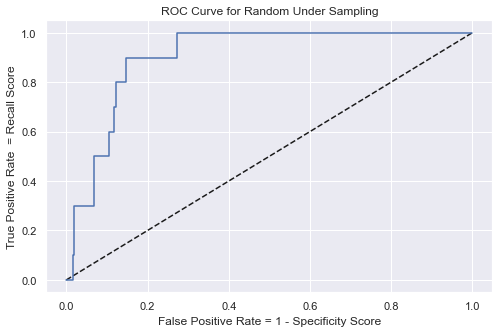

In [1011]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve for Random Under Sampling')
plt.show()

In [1012]:
prediction=grid_rus.predict(X_val)
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88       351
           1       0.11      0.90      0.20        10

    accuracy                           0.80       361
   macro avg       0.55      0.85      0.54       361
weighted avg       0.97      0.80      0.86       361

Confusion matrix:
 [[278  73]
 [  1   9]]


In [1013]:
#another way to calculate best threshold
#scores=[f1_score(y_val, to_label(prob,t)) for t in threshold]
#ix=argmax(scores)
#print('Threshold=%.3f, F-Score=%.5f' % (threshold[ix], scores[ix]))

In [1014]:
scores_val(grid_rus, 'Random Under Sampling')

,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Random Under Sampling,0.767677,0.3,0.961219,0.3,0.3


In [1015]:
rus_val=scores_val(grid_rus, 'Random Under Sampling')

     pred_neg  pred_pos
neg       342         9
pos         7         3


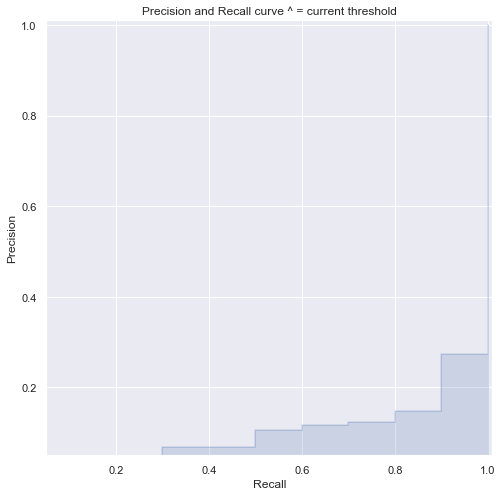

In [1016]:
precision_recall_threshold(fpr, tpr, thresholds, t=0.76)

### Testing

In [1017]:
prob=grid_rus.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, prob) #Get the ROC Curve
roc_auc_score(y_test, prob)

0.9005681818181818

In [1018]:
prediction=grid_rus.predict(X_test)
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87       352
           1       0.09      0.80      0.16        10

    accuracy                           0.78       362
   macro avg       0.54      0.79      0.52       362
weighted avg       0.97      0.78      0.85       362

Confusion matrix:
 [[273  79]
 [  2   8]]


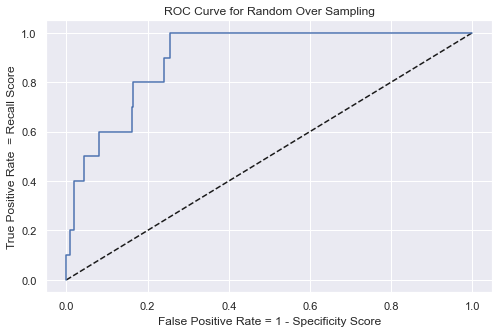

In [1019]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve for Random Over Sampling')
plt.show()

In [1020]:
scores_test(grid_rus, 'Random Under Sampling')

,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Random Under Sampling,0.767677,0.363636,0.961326,0.4,0.333333


In [1021]:
rus_test=scores_test(grid_rus, 'Random Under Sampling')

     pred_neg  pred_pos
neg       344         8
pos         6         4


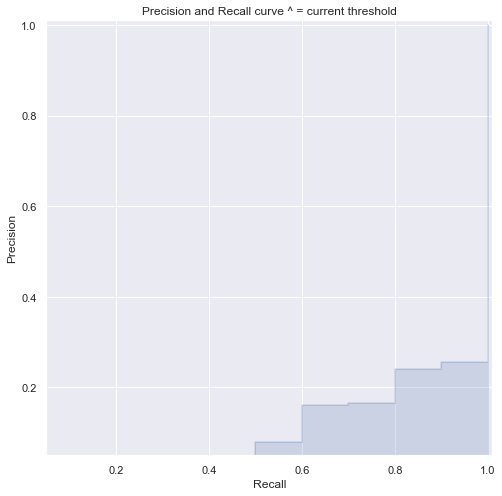

In [1022]:
precision_recall_threshold_test(fpr, tpr, thresholds, t=0.7676)

### Random Over Sampling

In [1023]:
grid.fit(X_ros, y_ros)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=51), n_jobs=-1,
             param_grid={'max_depth': [10, 16], 'max_features': ['log2', 50],
                         'min_samples_leaf': [6, 10],
                         'min_samples_split': [4, 6],
                         'n_estimators': [300, 400], 'random_state': [51]},
             scoring='f1')

In [1024]:
grid_ros=grid.best_estimator_
grid_ros


RandomForestClassifier(max_depth=16, max_features=50, min_samples_leaf=6,
                       min_samples_split=4, n_estimators=300, random_state=51)

In [1025]:
prob=grid_ros.predict_proba(X_val)[:,1]
fpr, tpr, thresholds  = roc_curve(y_val, prob) #Get the ROC Curve
roc_auc_score(y_val, prob)

0.9794871794871794

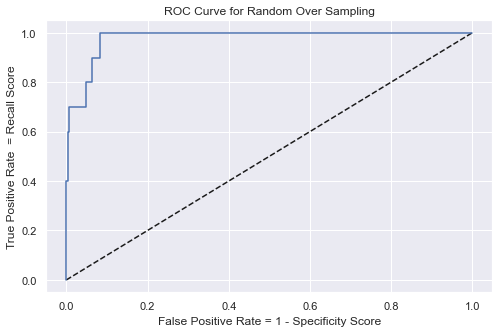

In [1026]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve for Random Over Sampling')
plt.show()

In [1027]:
prediction=grid_ros.predict(X_val)
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       351
           1       0.54      0.70      0.61        10

    accuracy                           0.98       361
   macro avg       0.76      0.84      0.80       361
weighted avg       0.98      0.98      0.98       361

Confusion matrix:
 [[345   6]
 [  3   7]]


In [1028]:
scores_val(grid_ros, 'Random Under Sampling')

,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Random Under Sampling,0.555556,0.736842,0.98615,0.7,0.777778


In [1029]:
ros_val=scores_val(grid_ros, 'Random Over Sampling')

     pred_neg  pred_pos
neg       349         2
pos         3         7


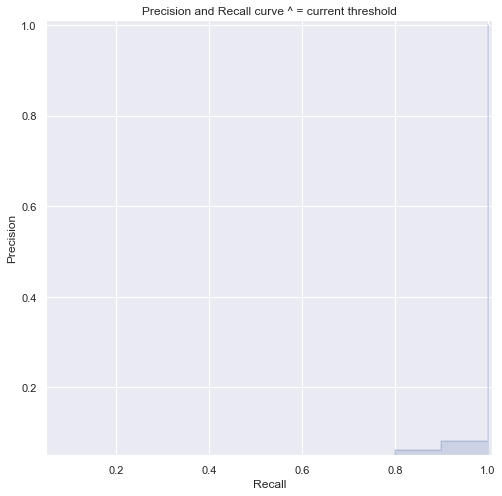

In [1030]:
precision_recall_threshold(fpr, tpr, thresholds, t=0.55)

## Testing

In [1038]:
prediction=grid_ros.predict(X_test)
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       352
           1       0.39      0.70      0.50        10

    accuracy                           0.96       362
   macro avg       0.69      0.83      0.74       362
weighted avg       0.97      0.96      0.97       362

Confusion matrix:
 [[341  11]
 [  3   7]]


In [1039]:
prob=grid_ros.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, prob) #Get the ROC Curve
roc_auc_score(y_test, prob)

0.9718749999999999

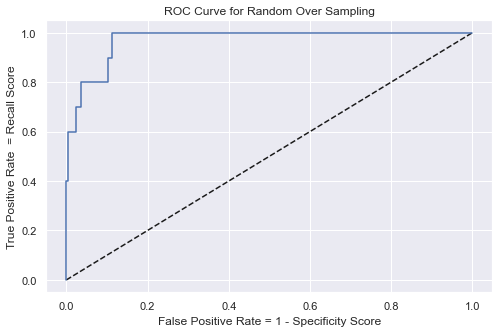

In [1040]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve for Random Over Sampling')
plt.show()

In [1041]:
scores_test(grid_ros, 'Random Over Sampling')

,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Random Over Sampling,0.636364,0.705882,0.986188,0.6,0.857143


In [1042]:
ros_test=scores_test(grid_ros, 'Random Over Sampling')

     pred_neg  pred_pos
neg       347         5
pos         4         6


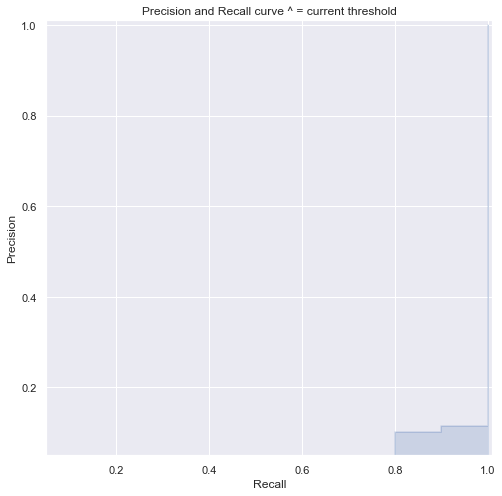

In [1043]:
precision_recall_threshold_test(fpr, tpr, thresholds, t=0.555)

### SMOTE

In [1044]:
grid.fit(X_smote,y_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=51), n_jobs=-1,
             param_grid={'max_depth': [10, 16], 'max_features': ['log2', 50],
                         'min_samples_leaf': [6, 10],
                         'min_samples_split': [4, 6],
                         'n_estimators': [300, 400], 'random_state': [51]},
             scoring='f1')

In [1045]:
grid_sm=grid.best_estimator_
grid_sm

RandomForestClassifier(max_depth=16, max_features=50, min_samples_leaf=6,
                       min_samples_split=4, n_estimators=400, random_state=51)

In [1046]:
prob=grid_sm.predict_proba(X_val)[:,1]
fpr, tpr, thresholds  = roc_curve(y_val, prob) #Get the ROC Curve
roc_auc_score(y_val, prob)

0.9757834757834758

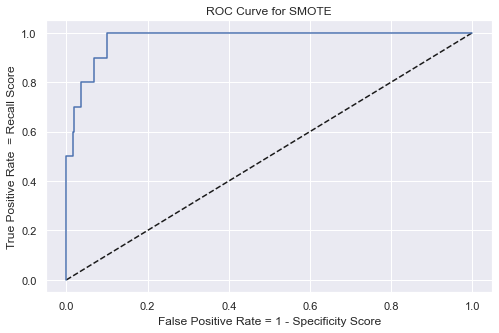

In [1047]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve for SMOTE')
plt.show()

In [1048]:
prediction=grid_sm.predict(X_val)
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       351
           1       0.45      0.50      0.48        10

    accuracy                           0.97       361
   macro avg       0.72      0.74      0.73       361
weighted avg       0.97      0.97      0.97       361

Confusion matrix:
 [[345   6]
 [  5   5]]


In [1049]:
scores_val(grid_sm, 'SMOTE')

sm_val=scores_val(grid_sm, 'SMOTE')

     pred_neg  pred_pos
neg       351         0
pos         5         5


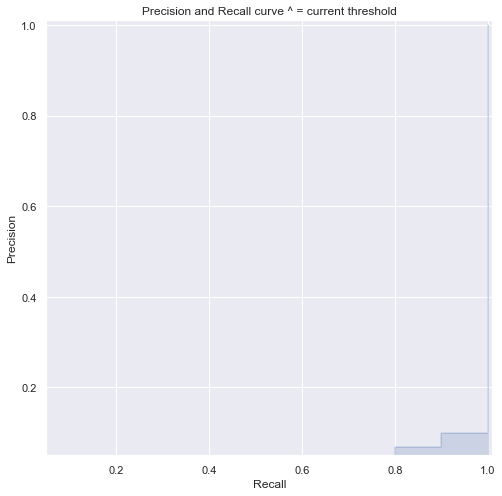

In [1050]:
precision_recall_threshold(fpr, tpr, thresholds, t=0.606)

### Testing

In [1051]:
prob=grid_sm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, prob) #Get the ROC Curve
roc_auc_score(y_test, prob)

0.9653409090909092

In [1052]:
prediction=grid_sm.predict(X_test)
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       352
           1       0.38      0.60      0.46        10

    accuracy                           0.96       362
   macro avg       0.68      0.79      0.72       362
weighted avg       0.97      0.96      0.97       362

Confusion matrix:
 [[342  10]
 [  4   6]]


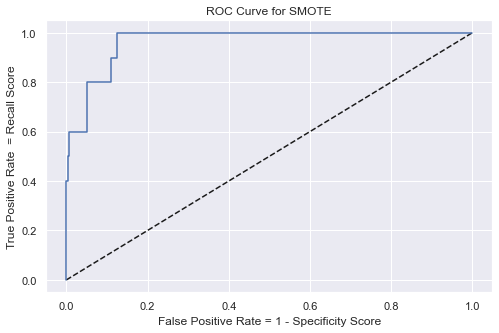

In [1053]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve for SMOTE')
plt.show()

     pred_neg  pred_pos
neg       350         2
pos         4         6


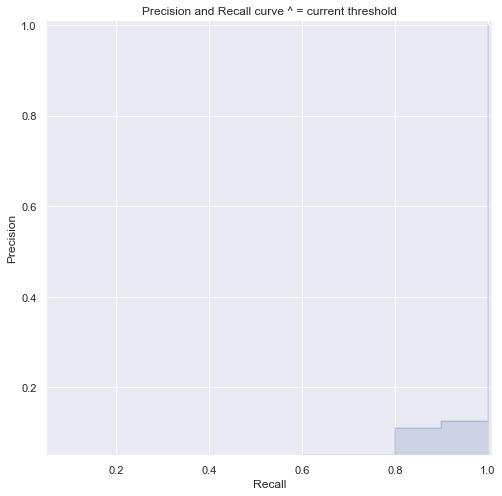

In [1054]:
precision_recall_threshold_test(fpr, tpr, thresholds, t=0.6161)

In [1055]:
scores_test(grid_sm, 'SMOTE')

,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,SMOTE,0.616162,0.666667,0.983425,0.6,0.75


In [1056]:
sm_test=scores_test(grid_sm, 'SMOTE')


## ADASYN

In [1057]:
grid.fit(X_ada,y_ada)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=51), n_jobs=-1,
             param_grid={'max_depth': [10, 16], 'max_features': ['log2', 50],
                         'min_samples_leaf': [6, 10],
                         'min_samples_split': [4, 6],
                         'n_estimators': [300, 400], 'random_state': [51]},
             scoring='f1')

In [1058]:
grid_ada=grid.best_estimator_

grid_ada

RandomForestClassifier(max_depth=16, max_features=50, min_samples_leaf=6,
                       min_samples_split=4, n_estimators=400, random_state=51)

In [1059]:
prob=grid_ada.predict_proba(X_val)[:,1]
fpr, tpr, thresholds  = roc_curve(y_val, prob) #Get the ROC Curve
roc_auc_score(y_val, prob)

0.9792022792022792

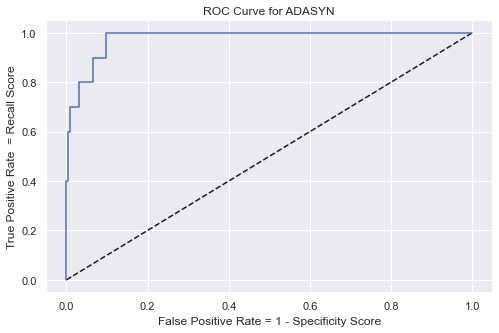

In [1060]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve for ADASYN')
plt.show()

In [1061]:
prediction=grid_ada.predict(X_val)
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_val, prediction))
conf_mat = confusion_matrix(y_val, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       351
           1       0.83      0.50      0.62        10

    accuracy                           0.98       361
   macro avg       0.91      0.75      0.81       361
weighted avg       0.98      0.98      0.98       361

Confusion matrix:
 [[350   1]
 [  5   5]]


In [1062]:
scores_val(grid_ada, 'ADASYN')

,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,ADASYN,0.474747,0.7,0.98338,0.7,0.7


In [1063]:
ada_val=scores_val(grid_ada, 'ADASYN')

     pred_neg  pred_pos
neg       348         3
pos         3         7


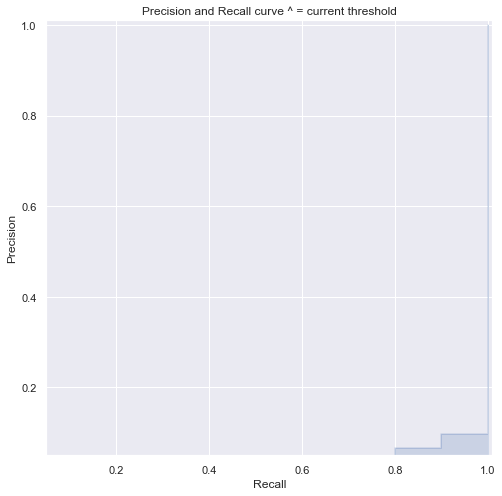

In [1064]:
precision_recall_threshold(fpr, tpr, thresholds, t=0.4747)

### Testing

In [1065]:
prob=grid_ada.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, prob) #Get the ROC Curve
roc_auc_score(y_test, prob)

0.9664772727272728

In [1066]:
prediction=grid_ada.predict(X_test)
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, prediction))
conf_mat = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       352
           1       0.46      0.60      0.52        10

    accuracy                           0.97       362
   macro avg       0.73      0.79      0.75       362
weighted avg       0.97      0.97      0.97       362

Confusion matrix:
 [[345   7]
 [  4   6]]


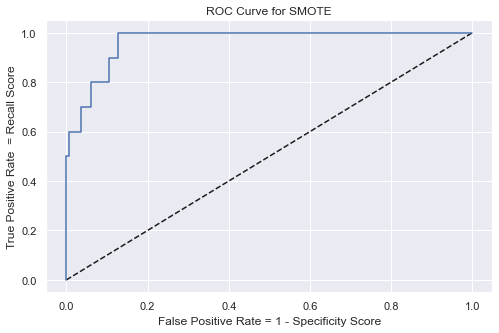

In [1067]:
plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve for SMOTE')
plt.show()

In [1068]:
scores_test(grid_ada, 'ADASYN')

,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,ADASYN,0.626263,0.666667,0.986188,0.5,1.0


In [1070]:
ada_test=scores_test(grid_ada, 'ADASYN')

     pred_neg  pred_pos
neg       352         0
pos         5         5


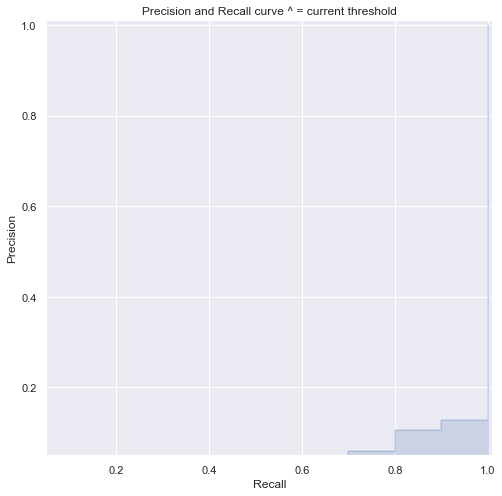

In [1071]:
precision_recall_threshold_test(fpr, tpr, thresholds, t=0.6262)

## Combining Score

### Validation Score

In [1091]:
val_score=pd.concat([rus_val,ros_val,sm_val,ada_val],axis=0)

In [1092]:
val_score=val_score.reset_index()

In [1093]:
val_score.drop(columns='index', inplace=True)


In [1094]:
val_score

,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Random Under Sampling,0.767677,0.300000,0.961219,0.3,0.300000
1,Random Over Sampling,0.555556,0.736842,0.986150,0.7,0.777778
2,SMOTE,0.606061,0.666667,0.986150,0.5,1.000000
3,ADASYN,0.474747,0.700000,0.983380,0.7,0.700000


### Testing Score

In [1087]:
test_score=pd.concat([rus_test,ros_test,sm_test,ada_test],axis=0)

In [1088]:
test_score=test_score.reset_index()

In [1089]:
test_score.drop(columns='index', inplace=True)

In [1090]:
test_score

,Sampling,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Random Under Sampling,0.767677,0.363636,0.961326,0.4,0.333333
1,Random Over Sampling,0.636364,0.705882,0.986188,0.6,0.857143
2,SMOTE,0.616162,0.666667,0.983425,0.6,0.750000
3,ADASYN,0.626263,0.666667,0.986188,0.5,1.000000
